# Tugas Besar - IF2220 - Probabilitas dan Statistika
# Penarikan Kesimpulan dan Pengujian Hipotesis

## Enam Langkah Testing
1. Tentukan Hipotesis nol $(H_0 : θ = θ_0)$, dimana $θ$ bisa berupa $μ$, $σ$, $p$, atau data lain berdistribusi tertentu (normal, binomial, dsc.).
2. Pilih hipotesis alternatif $H_1$ salah dari dari $θ > θ_0$ , $θ < θ_0$, atau $θ ≠ θ_0$.
3. Tentukan tingkat signifikan $α$.
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung $p$-value sesuai dengan uji statistik yang digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika $p$-value lebih kecil dibanding tingkat signifikansi α yang diinginkan

## Table of Contents
1. Soal<br>
    1.1 [Menulis Deskripsi Statistika](#1.1-Menulis-Deskripsi-Statistika)<br>
    1.2 [Membuat Visualisasi Plot Distribusi](#1.2-Membuat-Visualisasi-Plot-Distribusi)<br>
    1.3 [Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak](#1.3-Menentukan-Setiap-Kolom-Numerik-Berdistribusi-Normal-atau-Tidak)<br>
    1.4 [Melakukan Test Hipotesis 1 Sampel](#1.4-Melakukan-Test-Hipotesis-1-Sampel)<br>
    1.5 [Melakukan Test Hipotesis 2 Sampel](#1.5-Melakukan-Test-Hipotesis-2-Sampel)<br>
2. Jawaban<br>
    2.1 [Menulis Deskripsi Statistika](#2.1-Menulis-Deskripsi-Statistika)<br>
    2.2 [Membuat Visualisasi Plot Distribusi](#2.2-Membuat-Visualisasi-Plot-Distribusi)<br>
    2.3 [Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak](#2.3-Menentukan-Setiap-Kolom-Numerik-Berdistribusi-Normal-atau-Tidak)<br>
    2.4 [Melakukan Test Hipotesis 1 Sampel dengan 6 Langkah Testing](#2.4-Melakukan-Test-Hipotesis-1-Sampel-dengan-6-Langkah-Testing)<br>
    2.4.1 [Nilai rata-rata pH di atas 3.29?](#2.4.1-Nilai-rata-rata-pH-di-atas-3.29?)<br>
    2.4.2 [Nilai rata-rata Residual Sugar tidak sama dengan 2.50?](#2.4.2-Nilai-rata-rata-Residual-Sugar-tidak-sama-dengan-2.50?)<br>
    2.4.3 [Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?](#2.4.3-Nilai-rata-rata-150-baris-pertama-kolom-sulphates-bukan-0.65?)<br>
    2.4.4 [Nilai rata-rata total sulfur dioxide di bawah 35?](#2.4.4-Nilai-rata-rata-total-sulfur-dioxide-di-bawah-35?)<br>
    2.4.5 [Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?](#2.4.5-Proporsi-nilai-total-sulfur-dioxide-yang-lebih-dari-40,-adalah-tidak-sama-dengan-50%-?)<br>
    2.5 [Melakukan Test Hipotesis 2 Sampel dengan 6 Langkah Testing](#2.5-Melakukan-Test-Hipotesis-2-Sampel-dengan-6-Langkah-Testing)<br>
3. Referensi

## Soal

Diberikan sebuah data anggur.csv yang dapat diakses pada utas berikut: [Dataset Tugas Besar IF2220](https://github.com/Raylouiss/K01-T1-IF2220-13521127-13521143/blob/main/anggur.csv). 

anggur.csv merupakan data metrik kualitas wine (minuman anggur) yang mengandung 12 kolom sebagai berikut:
1. fixed acidity
2. volatile acidity
3. citric acid
4. residual sugar
5. chlorides
6. free sulfur dioxide
7. total sulfur dioxide
8. density
9. pH
10. sulphates
11. alcohol
12. quality
Kolom 1-11 adalah kolom atribut (non-target), sedangkan kolom 12 adalah kolom target

Anda diminta untuk melakukan analisis statistika sebagai berikut : 

## 1.1 Menulis Deskripsi Statistika

Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

## 1.2 Membuat Visualisasi Plot Distribusi

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

## 1.3 Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak

Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

## 1.4 Melakukan Test Hipotesis 1 Sampel

Melakukan test hipotesis 1 sampel,
1. Nilai rata-rata pH di atas 3.29?
2. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?
3. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?
4. Nilai rata-rata total sulfur dioxide di bawah 35?
5. Proporsi nilai total sulfur dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?

## 1.5 Melakukan Test Hipotesis 2 Sampel
1. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?
2. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?
3. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates ?
4. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?
5. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?


## Jawaban

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, t, ttest_ind, ttest_1samp,f, norm
import seaborn as sns
import math

anggur = pd.read_csv("anggur.csv")

## 2.1 Menulis Deskripsi Statistika

Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

In [2]:
desc = anggur.describe(include = [np.number])
desc= desc.rename(index={"50%": "median"})
desc.loc['modus'] = anggur.mode(numeric_only=True).iloc[0]
desc.loc["variansi"] = anggur.var()
desc.loc['range'] = desc.loc['max'] - desc.loc['min']
desc.loc['IQR'] = desc.loc['75%'] - desc.loc['25%']
desc.loc['skewness'] = anggur.skew()
desc.loc['kurtosis'] = anggur.kurtosis()
desc

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.152530,0.520838,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
std,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
min,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
median,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
75%,8.000000,0.585375,0.302325,3.220873,0.095312,18.313098,47.022500,0.997200,3.370000,0.670000,11.622500,9.000000
max,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000
modus,6.540000,0.554600,0.301900,0.032555,0.015122,0.194679,35.200000,0.995900,3.340000,0.590000,9.860000,8.000000
variansi,1.443837,0.009187,0.002411,0.975977,0.000404,23.893519,99.316519,0.000004,0.010999,0.010164,2.282233,0.815051


## 2.2 Membuat Visualisasi Plot Distribusi

Membuat Visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

### 2.2.1 Distribusi Fixed Acidity

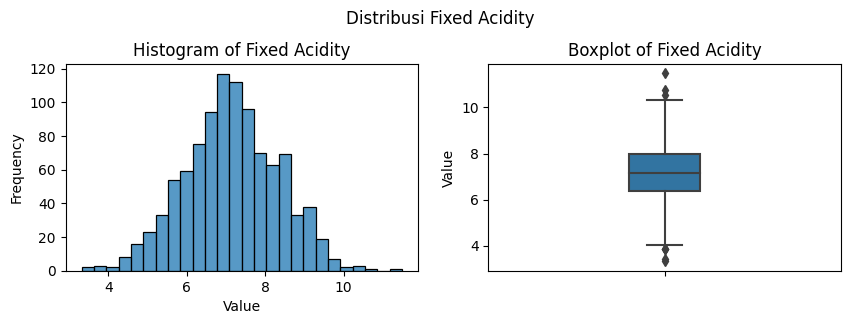

In [58]:
#Fixed Acidity

#Ambil data Fixed Acidity
fixedAcidity = anggur["fixed acidity"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Fixed Acidity")

#Membuat Histogram
hist = sns.histplot(fixedAcidity, bins="auto", ax = axs[0])
hist.set_title('Histogram of Fixed Acidity')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = fixedAcidity, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Fixed Acidity')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.2 Distribusi Volatile Acidity

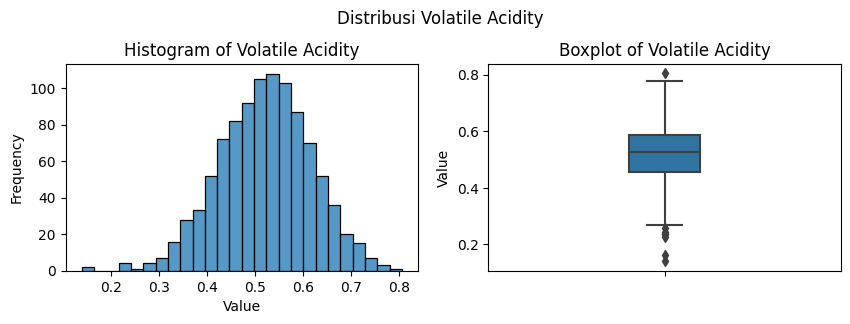

In [59]:
#Volatile Acidity

#Ambil data Volatile Acidity
volatileAcidity = anggur["volatile acidity"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Volatile Acidity")

#Membuat Histogram
hist = sns.histplot(volatileAcidity, bins="auto", ax = axs[0])
hist.set_title('Histogram of Volatile Acidity')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = volatileAcidity, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Volatile Acidity')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.3 Distribusi Citric Acid

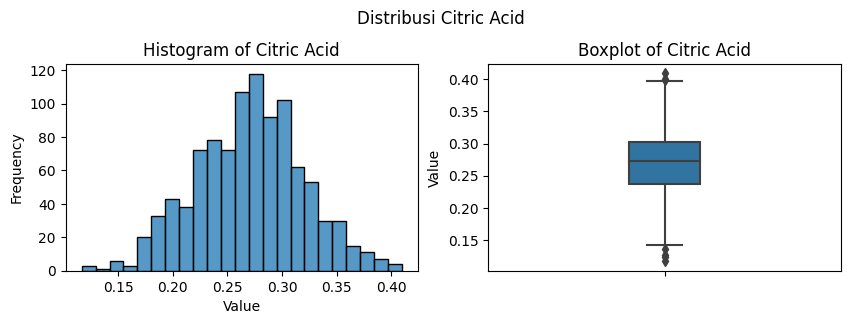

In [60]:
#Citric Acid

#Ambil data Citric Acid
citricAcid = anggur["citric acid"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Citric Acid")

#Membuat Histogram
hist = sns.histplot(citricAcid, bins="auto", ax = axs[0])
hist.set_title('Histogram of Citric Acid')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = citricAcid, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Citric Acid')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.4 Distribusi Residual Sugar

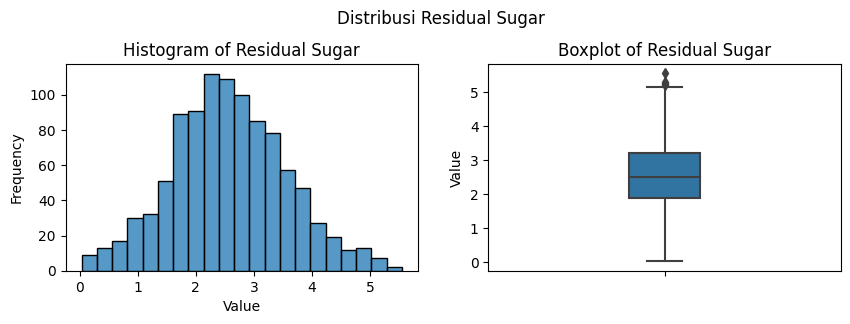

In [61]:
#Residual Sugar

#Ambil data Residual Sugar
residualSugar = anggur["residual sugar"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Residual Sugar")

#Membuat Histogram
hist = sns.histplot(residualSugar, bins="auto", ax = axs[0])
hist.set_title('Histogram of Residual Sugar')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = residualSugar, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Residual Sugar')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.5 Distribusi Chlorides

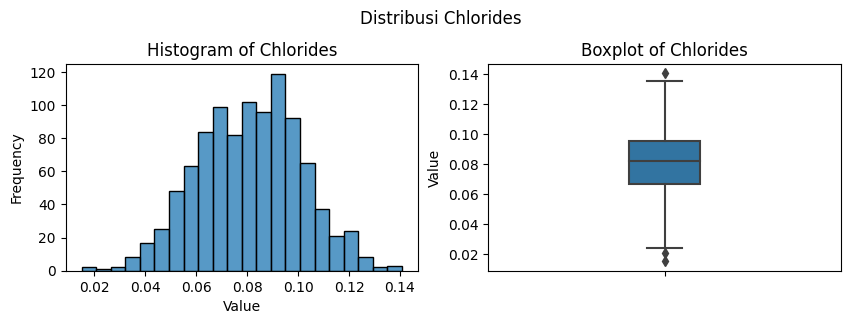

In [62]:
#Chlorides

#Ambil data Chlorides
chlorides = anggur["chlorides"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Chlorides")

#Membuat Histogram
hist = sns.histplot(chlorides, bins="auto", ax = axs[0])
hist.set_title('Histogram of Chlorides')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = chlorides, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Chlorides')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.6 Distribusi Free Sulfur Dioxide

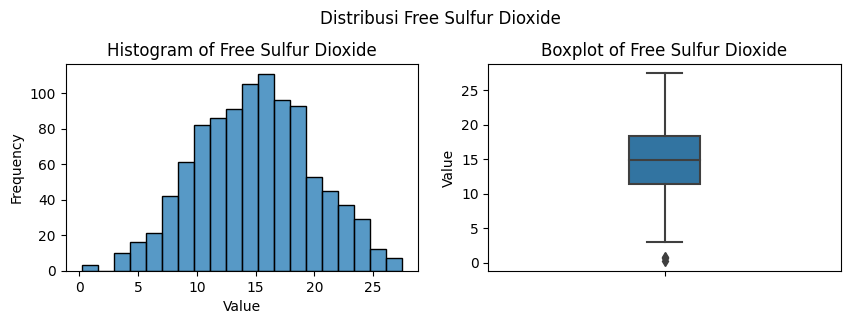

In [63]:
#Free Sulfur Dioxide

#Ambil data Free Sulfur Dioxide
freeSulfurDioxide = anggur["free sulfur dioxide"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Free Sulfur Dioxide")

#Membuat Histogram
hist = sns.histplot(freeSulfurDioxide, bins="auto", ax = axs[0])
hist.set_title('Histogram of Free Sulfur Dioxide')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = freeSulfurDioxide, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Free Sulfur Dioxide')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.7 Distribusi Density

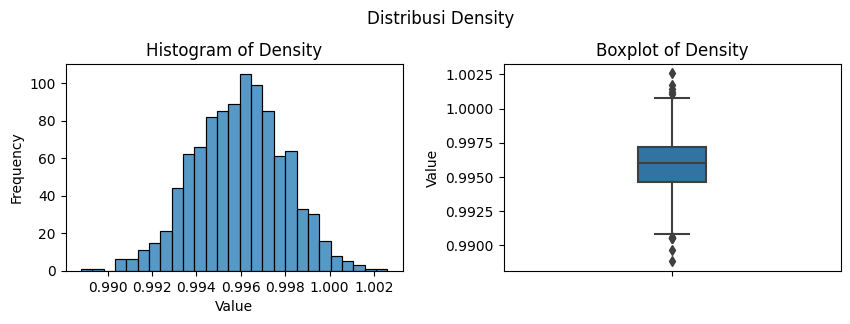

In [67]:
#Density

#Ambil data Density
density = anggur["density"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Density")

#Membuat Histogram
hist = sns.histplot(density, bins="auto", ax = axs[0])
hist.set_title('Histogram of Density')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = density, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Density')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8, wspace = 0.3)

#Melakukan plot
plt.show()

### 2.2.8 Distribusi pH

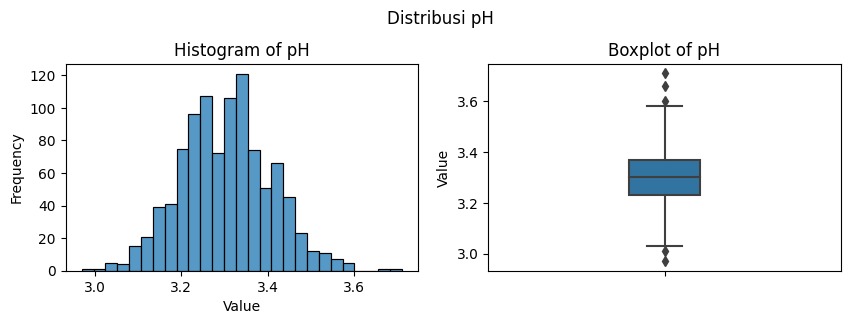

In [68]:
#pH

#Ambil pH
pH = anggur["pH"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi pH")

#Membuat Histogram
hist = sns.histplot(pH, bins="auto", ax = axs[0])
hist.set_title('Histogram of pH')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = pH, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of pH')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.9 Distribusi Sulphates

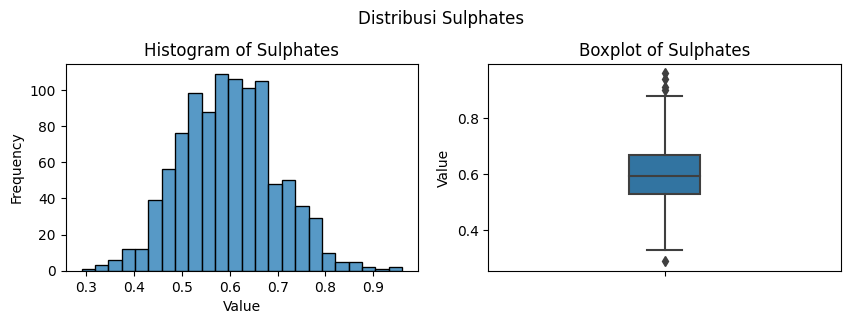

In [70]:
#Sulphates

#Ambil Sulphates
sulphates = anggur["sulphates"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Sulphates")

#Membuat Histogram
hist = sns.histplot(sulphates, bins="auto", ax = axs[0])
hist.set_title('Histogram of Sulphates')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = sulphates, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Sulphates')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.10 Distribusi Alcohol

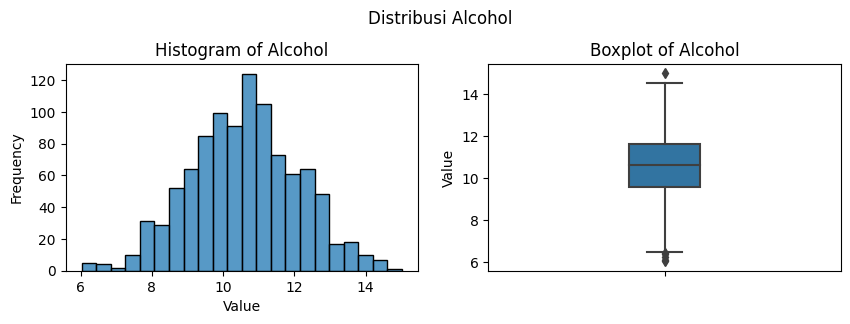

In [75]:
#Alcohol

#Ambil Alcohol
alcohol = anggur["alcohol"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Alcohol")

#Membuat Histogram
hist = sns.histplot(alcohol, bins="auto", ax = axs[0])
hist.set_title('Histogram of Alcohol')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = alcohol, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Alcohol')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

### 2.2.11 Distribusi Quality

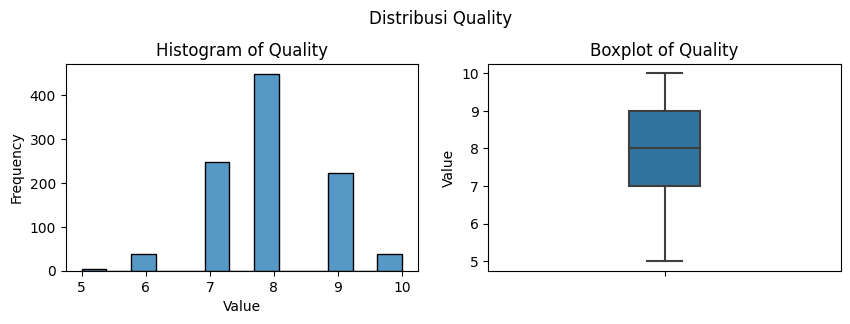

In [76]:
#Quality

#Ambil Quality
quality = anggur["quality"]

#Membuat subplot
fig, axs = plt.subplots(ncols = 2, figsize = (10, 3))
fig.suptitle("Distribusi Quality")

#Membuat Histogram
hist = sns.histplot(quality, bins="auto", ax = axs[0])
hist.set_title('Histogram of Quality')
hist.set_xlabel('Value')
hist.set_ylabel('Frequency')

#Membuat Boxplot
boxPlot = sns.boxplot(data = anggur, y = quality, ax = axs[1], width=0.2)
boxPlot.set_title('Boxplot of Quality')
boxPlot.set_ylabel('Value')

#Mengatur jarak judul dengan subplots
plt.subplots_adjust(top = 0.8)

#Melakukan plot
plt.show()

## 2.3 Menentukan Setiap Kolom Numerik Berdistribusi Normal atau Tidak
Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

fixed acidity is normally distributed with p_value = 0.9308584274486692


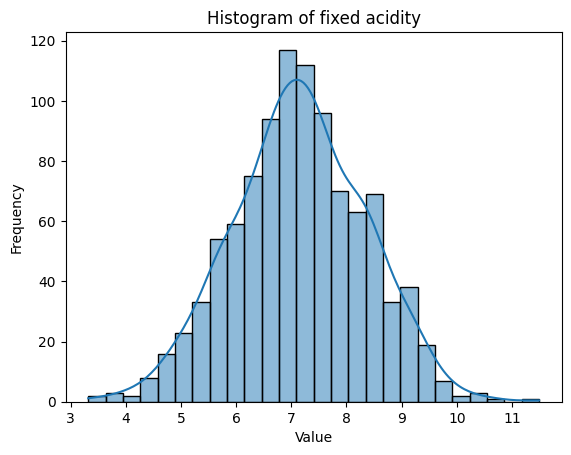

volatile acidity is not normally distributed with p_value = 0.022581461594113835


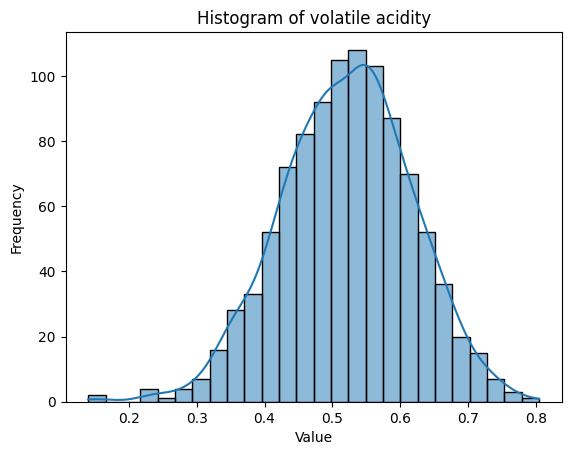

citric acid is normally distributed with p_value = 0.6816899375976969


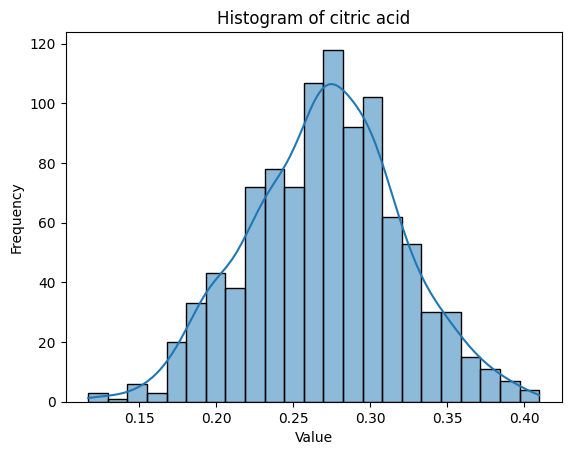

residual sugar is normally distributed with p_value = 0.2246670332131056


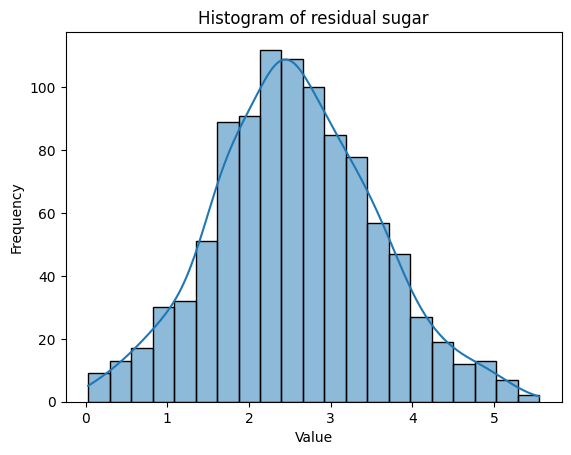

chlorides is normally distributed with p_value = 0.17048274704296862


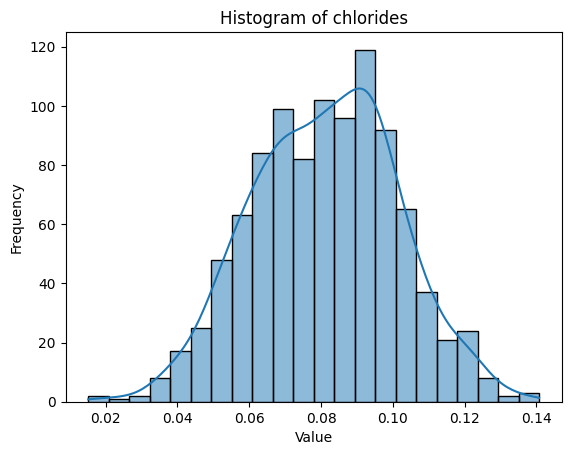

free sulfur dioxide is not normally distributed with p_value = 0.01743043451827735


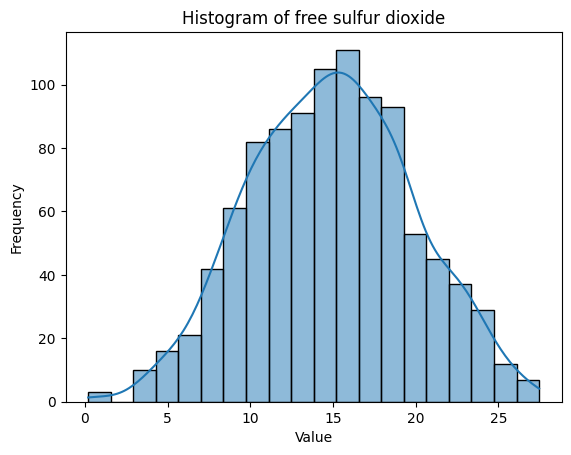

total sulfur dioxide is normally distributed with p_value = 0.8488846101395726


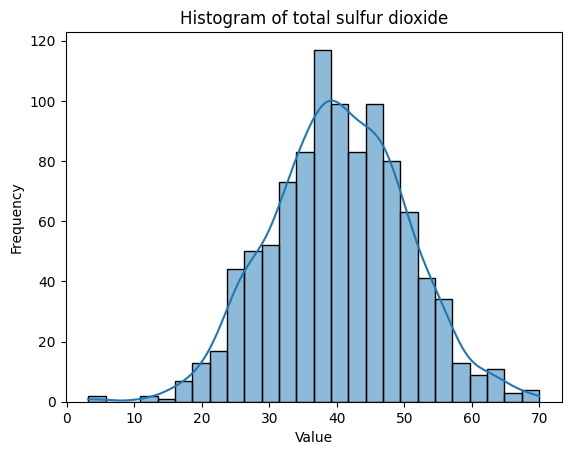

density is normally distributed with p_value = 0.5985227325531981


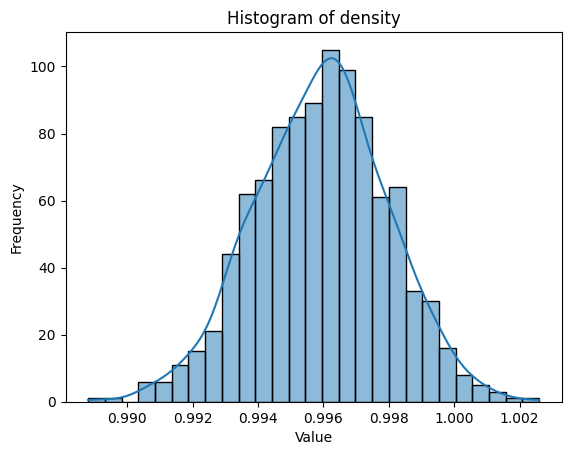

pH is normally distributed with p_value = 0.13678740824860436


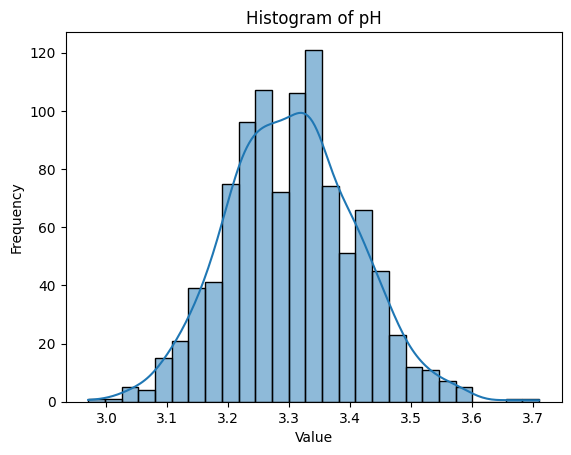

sulphates is normally distributed with p_value = 0.13884318628391681


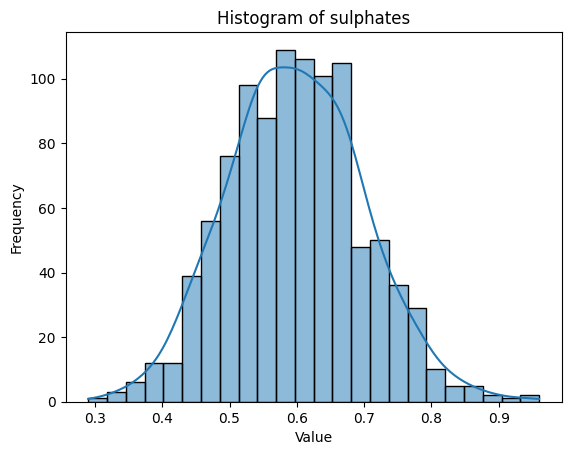

alcohol is normally distributed with p_value = 0.6790884901361043


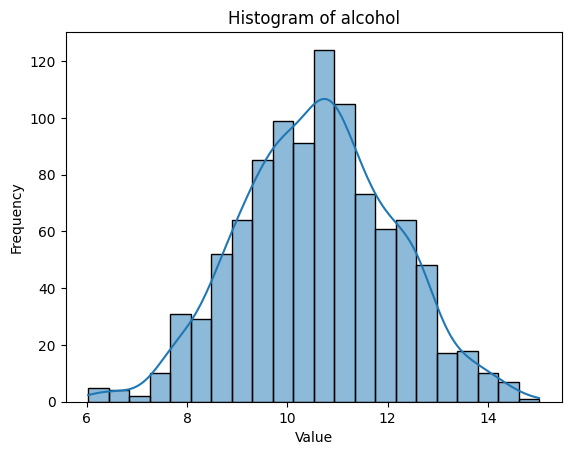

quality is normally distributed with p_value = 0.3888139394184818


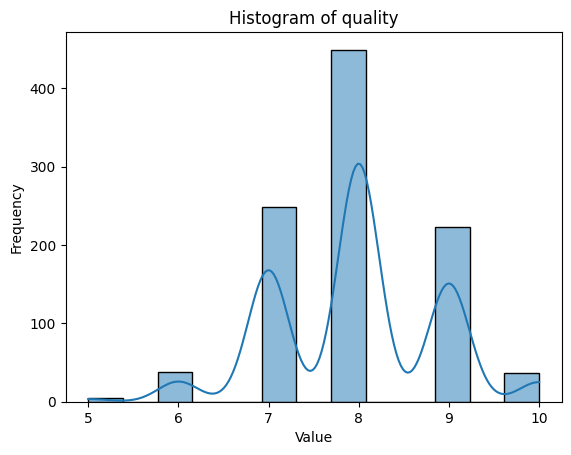

In [79]:
from scipy.stats import normaltest

for col in anggur.select_dtypes(include=[np.number]):
    stat, p = normaltest(anggur[col])
    alpha = 0.05
    
    if p > alpha:
        print(f'{col} is normally distributed with p_value = {p}')
    else:
        print(f'{col} is not normally distributed with p_value = {p}')
    
    sns.histplot(anggur[col], bins="auto", kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## 2.4 Melakukan Test Hipotesis 1 Sampel dengan 6 Langkah Testing

Melakukan test hipotesis 1 sampel,<br>
a. Nilai rata-rata pH di atas 3.29?<br>
b. Nilai rata-rata Residual Sugar tidak sama dengan 2.50?<br>
c. Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?<br>
d. Nilai rata-rata total sulfur dioxide di bawah 35?<br>
e. Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?<br>

### 2.4.1 Nilai rata-rata pH di atas 3.29?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{pH} = 3.29$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{pH} > 3.29$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **one-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{0.05} = t_{0.95} = 1.646$<br>

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $t = \Large\frac{\bar{x} - \mu_0}{s / \sqrt{n}}$<br>
    
    Dengan $\bar{x}$ adalah nilai rata-rata sampel,<br>
    $\mu_0$ adalah nilai rata-rata hipotesis,<br>
    $s$ adalah standar deviasi sampel, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*

In [96]:
anggurPH = anggur['pH']
mean = anggurPH.mean()
n = len(anggurPH)
std = anggurPH.std()
x = 3.29

# Langkah 1
# H0 : mean = 3.29

# Langkah 2
# H1 : mean > 3.29

# Langkah 3
alpha = 0.05

# Langkah 4
dof = n-1 
tCrit = t.ppf(1-alpha, dof)

# langkah 5
tValue = ((mean - x) / (std / math.sqrt(n)))

print(f'daerah kritis = {tCrit}')
print(f't = {tValue}')

# Langkah 6
if (tValue > tCrit):
    print("Tolak H0, mean > 3.29")
    print("Nilai rata - rata pH di atas 3.29")
else:
    print("Tidak menolak H0, mean = 3.29")
    print("Nilai rata - rata pH sama dengan 3.29")

daerah kritis = 1.646380345427535
t = 4.1037807933651145
Tolak H0, mean > 3.29
Nilai rata - rata pH di atas 3.29


### 2.4.2 Nilai rata-rata Residual Sugar tidak sama dengan 2.50?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{residualSugar} = 2.5$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{residualSugar} \neq 2.5$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{1-\alpha} = t_{0.95} = 1.646$<br> atau $t < t_{0.05} = -1.646$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $t = \Large\frac{\bar{x} - \mu_0}{s / \sqrt{n}}$<br>
    
    Dengan $\bar{x}$ adalah nilai rata-rata sampel,<br>
    $\mu_0$ adalah nilai rata-rata hipotesis,<br>
    $s$ adalah standar deviasi sampel, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*

In [95]:
anggurResidualSugar = anggur['residual sugar']
mean = anggurResidualSugar.mean()
n = len(anggurResidualSugar)
std = anggurResidualSugar.std()
x = 2.5

# Langkah 1
# H0 : mean = 2.5

# Langkah 2
# H1 : mean != 2.5

# Langkah 3
alpha = 0.05

# Langkah 4
dof = n-1
tCrit1 = t.ppf(alpha/2, dof)
tCrit2 = t.ppf(1-alpha/2, dof)

# langkah 5
tValue = ((mean - x) / (std / math.sqrt(n)))

print(f'daerah kritis = {tCrit1} dan {tCrit2}')
print(f't = {tValue}')

# Langkah 6
if (tValue > tCrit2 or tValue < tCrit1):
    print("Tolak H0, mean != 2.5")
    print("Nilai rata - rata residual sugar tidak sama dengan 2.5")
else:
    print("Tidak menolak H0, mean = 2.5")
    print("Nilai rata - rata residual sugar sama dengan 2.5")

daerah kritis = -1.962341461133449 dan 1.9623414611334487
t = 2.1479619435539523
Tolak H0, mean != 2.5
Nilai rata - rata residual sugar tidak sama dengan 2.5


### 2.4.3 Nilai rata-rata 150 baris pertama kolom sulphates bukan 0.65?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{sulphates} = 0.65$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{sulphates} \neq 0.65$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{1-\alpha} = t_{0.95} = 1.646$<br> atau $t < t_{0.05} = -1.646$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $t = \Large\frac{\bar{x} - \mu_0}{s / \sqrt{n}}$<br>
    
    Dengan $\bar{x}$ adalah nilai rata-rata sampel,<br>
    $\mu_0$ adalah nilai rata-rata hipotesis,<br>
    $s$ adalah standar deviasi sampel, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*

In [94]:
anggurSulphates = anggur['sulphates'].head(150)
mean = anggurSulphates.mean()
n = len(anggurSulphates)
std = anggurSulphates.std()
x = 0.65

# Langkah 1
# H0 : mean = 0.65

# langkah 2
# H1 : mean != 0.65

# Langkah 3
alpha = 0.05

# Langkah 4
dof = n-1
tCrit1 = t.ppf(alpha/2, dof)
tCrit2 = t.ppf(1-alpha/2, dof)

# langkah 5
tValue = ((mean - x) / (std / math.sqrt(n)))

print(f'daerah kritis = {tCrit1} dan {tCrit2}')
print(f't = {tValue}')

# Langkah 6
if (tValue > tCrit2 or tValue < tCrit1):
    print("Tolak H0, mean != 0.65")
    print("Nilai rata-rata 150 baris pertama kolom sulphates tidak sama dengan 0.65")
else:
    print("Tidak menolak H0, mean = 0.65")
    print("Nilai rata-rata 150 baris pertama kolom sulphates sama dengan 0.65")

daerah kritis = -1.9760131776791554 dan 1.976013177679155
t = -4.964843393315918
Tolak H0, mean != 0.65
Nilai rata-rata 150 baris pertama kolom sulphates tidak sama dengan 0.65


### 2.4.4 Nilai rata-rata total sulfur dioxide di bawah 35?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{sulfurDioxide} = 35$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{sulfurDioxide} < 35$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **one-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t < t_{0.05} = -1.646$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $t = \Large\frac{\bar{x} - \mu_0}{s / \sqrt{n}}$<br>
    
    Dengan $\bar{x}$ adalah nilai rata-rata sampel,<br>
    $\mu_0$ adalah nilai rata-rata hipotesis,<br>
    $s$ adalah standar deviasi sampel, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*
    

In [91]:
anggurSulfurDioxide = anggur['total sulfur dioxide']
mean = anggurSulfurDioxide.mean()
n = len(anggurSulfurDioxide)
std = anggurSulfurDioxide.std()
x = 35

#Langkah 1
#H0 : mean = 35

#Langkah 2
#H1 : mean < 35

#Langkah3
alpha = 0.05

#Langkah 4
df = n - 1
tCrit = t.ppf(alpha, df)

#Langkah 5
tValue = ((mean - x)/(std / math.sqrt(n)))
pValue = t.cdf(abs(tValue),df)

print(f'daerah kritis = {tCrit}')
print(f't = {tValue}')

#Langkah 6
if tValue < tCrit:
    print ("Tolak H0, mean < 35")
    print("Nilai rata-rata total sulfur dioxide di bawah 35")
    
else :
    print ("Tidak Tolak H0, mean = 35")
    print("Nilai rata-rata total sulfur dioxide sama dengan 35")

daerah kritis = -1.6463803454275356
t = 16.786387372296744
Tidak Tolak H0, mean = 35
Nilai rata-rata total sulfur dioxide sama dengan 35


### 2.4.5 Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50% ?


1. **Hipotesis Nol**<br>
$H_0 : P(X > 40) = 0.5$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : P(X > 40) \neq 0.5$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **two-tailed**.<br>
<br>
    Karena sampel yang diambil terlalu besar, maka akan digunakan binomial didekati normal<br>
    Sehingga berdasarkan tabel distribusi normal atau fungsi distribusi normal yang tersedia di python di dapatkan nilai kritis<br> 
    $z < -z_{\alpha / 2} = -1.96$ atau $z > z_{\alpha / 2} = 1.96$<br>
 
5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test dengan rumus sebagai berikut<br>
    
    $z = \Large\frac{x - np_0}{\sqrt{np_0q_0}}$ = $\Large\frac{\hat{p} - p_0}{\sqrt{p_0q_0 / n}}$<br>
    
    Dengan $\hat{p}$ adalah proporsi sampel,<br>
    $x$ adalah banyak sampel yang memenuhi syarat,<br>
    $p_0$ adalah proporsi hipotesis,<br>
    $q_0$ adalah $1-p_0$, <br>
    $\sqrt{n}$ adalah jumlah sampel<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel z-test*

In [101]:
n = len(anggur['total sulfur dioxide'])
p = np.sum(anggur['total sulfur dioxide'] > 40)/n
P0 = 0.5

#Langkah 1
#H0 : P(X > 40) = 0.5

#Langkah 2
#H1 : P(X > 40) != 0.5

#Langkah3
alpha = 0.05

#Langkah 4
zCrit1 = norm.ppf(alpha/2)
zCrit2 = norm.ppf(1-alpha/2)

#Langkah 5
zValue = (p - P0) / math.sqrt(P0 * (1 - P0) / n)

print(f'daerah kritis = {zCrit1} dan {zCrit2}')
print(f'z = {zValue}')

#Langkah 6
if zValue < zCrit1 or zValue > zCrit2 :
    print ("Tolak H0, P(X > 40) != 0.5")
    print("Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah tidak sama dengan 50%")
else :
    print ("Tidak tolak H0, P(X > 40) = 0.5")
    print("Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah sama dengan 50%")

daerah kritis = -1.9599639845400545 dan 1.959963984540054
z = 0.7589466384404118
Tidak tolak H0, P(X > 40) = 0.5
Proporsi nilai total Sulfat Dioxide yang lebih dari 40, adalah sama dengan 50%


## 2.5 Melakukan Test Hipotesis 2 Sampel dengan 6 Langkah Testing


 Melakukan test hipotesis 2 sampel,<br>
1. Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama? <br>
2. Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001? <br>
3. Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates? <br>
4. Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?<br>
5. Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?<br>

In [103]:
def isVarianEqual(sample1, sample2, alpha) :
    # Langkah 1
    # H0 : variansi1 = variansi2

    # Langkah 2
    # H1 : variansi1 != variansi2

    # Langkah 3
    # alpha = 0.05

    # Langkah 4
    F = sample1.var() / sample2.var()
    dfn = len(sample1) - 1 # degrees of freedom numerator
    dfd = len(sample2) - 1 # degrees of freedom denominator

    # Langkah 5
    fCrit2 = f.ppf(1-alpha/2, dfn, dfd)
    fCrit1 = 1/fCrit2
    
    # Langkah 6
    if (F < fCrit1 or F > fCrit2): # Reject H0
        return False
    else :                         # Failed to reject H0
        return True

### 2.5.1 Data kolom fixed acidity dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata kedua bagian tersebut sama?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{fixedAcidityAwal} - \mu_{fixedAcidityAkhir} = 0$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{fixedAcidityAwal} - \mu_{fixedAcidityAkhir} \neq 0$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diinginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{1-\alpha} = t_{0.975} = 1.962$<br> atau $t < t_{0.025} = -1.962$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test. Untuk t-test 2 sample, harus diuji terlebih dahulu apakah variansi dari kedua sampel sama atau tidak. Berdasarkan hasil f-test yang dilakukan, ditemukan bahwa variansi kedua sample sama.Maka akan digunakan t-test dengan rumus sebagai berikut <br>
    
    $t = \Large\frac{( \bar{x_1} - \bar{x_2} )}{s_p  \sqrt{1/n_1 + 1/n_2}}$<br>
    
    Dengan $\bar{x_1}$ adalah nilai rata-rata sampel 1,<br>
    $\bar{x_2}$ adalah nilai rata-rata sampel 2,<br>
    $s_p$ adalah standar deviasi sampel gabungan, <br>
    $n_1$ adalah jumlah sampel 1,<br>
    $n_2$ adalah jumlah sampel 2<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*
    

In [110]:
# nomor 5a

n = len(anggur['fixed acidity'])
anggurFixedAcidity1 = anggur['fixed acidity'][:n//2]
anggurFixedAcidity2 = anggur['fixed acidity'][n//2:]
mean1 = anggurFixedAcidity1.mean()
mean2 = anggurFixedAcidity2.mean()
n1 = len(anggurFixedAcidity1)
n2 = len(anggurFixedAcidity2)
std1 = anggurFixedAcidity1.std()
std2 = anggurFixedAcidity2.std()
alpha = 0.05

# test if varian equal or no
varianEqual = isVarianEqual(anggurFixedAcidity1,anggurFixedAcidity2,alpha)
print ("varian equal = ", varianEqual)

#t-test

#Langkah 1
#H0 : mean1 - mean2 = 0

#Langkah 2
#H1 : mean1 - mean2 != 0

#Langkah3
alpha = 0.05

#Langkah 4
df = n1 + n2 - 2
tCrit1 = t.ppf(alpha/2, df)
tCrit2 = t.ppf(1 - alpha/2, df)

#Langkah 5
stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
tValue = (mean1 - mean2)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
p_value = (1-t.cdf(abs(tValue),df))*2

print(f'daerah kritis = {tCrit1} dan {tCrit2}')
print(f't = {tValue}')

#Langkah 6
if (tValue > tCrit2 or tValue < tCrit1):
    print ("Tolak H0, mean1 dan mean2 berbeda")
    print ("Rata-rata kolom fixed acidity bagian awal dan akhir tersebut tidak sama")
else :
    print ("Tidak Tolak H0, mean1 dan mean2 sama")
    print ("Rata-rata kolom fixed acidity bagian awal dan akhir tersebut sama")

varian equal =  True
daerah kritis = -1.962343846216334 dan 1.9623438462163336
t = 0.026041069999063794
Tidak Tolak H0, mean1 dan mean2 sama
Rata-rata kolom fixed acidity bagian awal dan akhir tersebut sama


### 2.5.2 Data kolom chlorides dibagi 2 sama rata: bagian awal dan bagian akhir kolom. Benarkah rata-rata bagian awal lebih besar daripada bagian akhir sebesar 0.001?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{chloridesAwal} - \mu_{chloridesAkhir} = 0.001$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{chloridesAwal} - \mu_{chloridesAkhir} \neq 0.001$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diinginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{1-\alpha} = t_{0.975} = 1.962$<br> atau $t < t_{0.025} = -1.962$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test. Untuk t-test 2 sample, harus diuji terlebih dahulu apakah variansi dari kedua sampel sama atau tidak. Berdasarkan hasil f-test yang dilakukan, ditemukan bahwa variansi kedua sample sama.Maka akan digunakan t-test dengan rumus sebagai berikut <br>
    
    $t = \Large\frac{( \bar{x_1} - \bar{x_2} - d_0)}{s_p  \sqrt{1/n_1 + 1/n_2}}$<br>
    
    Dengan $\bar{x_1}$ adalah nilai rata-rata sampel 1,<br>
    $\bar{x_2}$ adalah nilai rata-rata sampel 2,<br>
    $s_p$ adalah standar deviasi sampel gabungan, <br>
    $n_1$ adalah jumlah sampel 1,<br>
    $n_2$ adalah jumlah sampel 2<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*
    

In [111]:
# nomor 5b

n = len(anggur['chlorides'])
anggurChrolides1 = anggur['chlorides'][:n//2]
anggurChrolides2 = anggur['chlorides'][n//2:]
mean1 = anggurChrolides1.mean()
mean2 = anggurChrolides2.mean()
n1 = len(anggurChrolides1)
n2 = len(anggurChrolides2)
std1 = anggurChrolides1.std()
std2 = anggurChrolides2.std()
d0 = 0.001
alpha = 0.05

# test if varian equal or no
varianEqual = isVarianEqual(anggurChrolides1, anggurChrolides2,alpha)
print ("varian equal = ", varianEqual)

#t-test

#Langkah 1
#H0 : mean1 - mean2 = 0.001

#Langkah 2
#H1 : mean1 - mean2 != 0.001

#Langkah3
alpha = 0.05

#Langkah 4
df = n1 + n2 - 2
tCrit1 = t.ppf(alpha/2, df)
tCrit2 = t.ppf(1-alpha/2, df)

#Langkah 5
stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
tValue = (mean1 - mean2-d0)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
p_value = (1-t.cdf(abs(tValue),df))*2

print(f'daerah kritis = {tCrit1} dan {tCrit2}')
print(f't = {tValue}')

#Langkah 6
if (tValue > tCrit2 or tValue < tCrit1):
    print ("Tolak H0, mean1 - mean2 != 0.001")
    print ("Rata-rata kolom chlorides bagian awal tidak lebih besar daripada bagian akhir sebesar 0.001")
else :
    print ("Tidak Tolak H0, mean1 - mean2 = 0.001")
    print ("Rata-rata kolom chlorides bagian awal lebih besar daripada bagian akhir sebesar 0.001")


varian equal =  True
daerah kritis = -1.962343846216334 dan 1.9623438462163336
t = -0.467317122852132
Tidak Tolak H0, mean1 - mean2 = 0.001
Rata-rata kolom chlorides bagian awal lebih besar daripada bagian akhir sebesar 0.001


### 2.5.3 Benarkah rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates?

1. **Hipotesis Nol**<br>
$H_0 : \mu_{volatileAcidity} - \mu_{Sulphates} = 0$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \mu_{volatileAcidity} - \mu_{Sulphates} \neq 0$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diinginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel t-test atau fungsi t-test yang tersedia di python di dapatkan nilai kritis $t > t_{1-\alpha} = t_{0.975} = 1.962$<br> atau $t < t_{0.025} = -1.962$

5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan t-test. Untuk t-test 2 sample, harus diuji terlebih dahulu apakah variansi dari kedua sampel sama atau tidak. Berdasarkan hasil f-test yang dilakukan, ditemukan bahwa variansi kedua sample sama.Maka akan digunakan t-test dengan rumus sebagai berikut <br>
    
    $t = \Large\frac{( \bar{x_1} - \bar{x_2} - d_0)}{s_p  \sqrt{1/n_1 + 1/n_2}}$<br>
    
    Dengan $\bar{x_1}$ adalah nilai rata-rata sampel 1,<br>
    $\bar{x_2}$ adalah nilai rata-rata sampel 2,<br>
    $s_p$ adalah standar deviasi sampel gabungan, <br>
    $n_1$ adalah jumlah sampel 1,<br>
    $n_2$ adalah jumlah sampel 2<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel t-test*
    

In [115]:
# nomor 5c

anggurVolatileAcidity = anggur['volatile acidity'][:25]
anggurSulphates = anggur['sulphates'][:25]
mean1 = anggurVolatileAcidity.mean()
mean2 = anggurSulphates.mean()
n1 = len(anggurVolatileAcidity)
n2 = len(anggurSulphates)
std1 = anggurVolatileAcidity.std()
std2 = anggurSulphates.std()
alpha = 0.05

# test if varian equal or no
varianEqual = isVarianEqual(anggurVolatileAcidity, anggurSulphates,alpha)
print ("varian equal = ", varianEqual)

#t-test

#Langkah 1
#H0 : mean1 - mean2 = 0

#Langkah 2
#H1 : mean1  - mean2 != 0

#Langkah3
alpha = 0.05

#Langkah 4
df2 = n1 + n2 -2
tCrit1 = t.ppf(alpha/2, df)
tCrit2 = t.ppf(1-alpha/2, df)

#Langkah 5
stdCombined = ((((n1 -1) * std1 * std1) + ((n2 -1) * std2 * std2)) / (n1 + n2 - 2))
tValue = (mean1 - mean2)/(math.sqrt(stdCombined) * math.sqrt(1/n1 + 1/n2))
p_value = (1-t.cdf(abs(tValue),df))*2

print(f'daerah kritis = {tCrit1} dan {tCrit2}')
print(f't = {tValue}')

#Langkah 6
if ( tValue > tCrit2 or tValue < tCrit1):
    print ("Tolak H0, mean1 dan mean2 berbeda")
    print ("Rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates")
else :
    print ("Tidak Tolak H0, mean1 dan mean2 sama")
    print ("Rata-rata sampel 25 baris pertama kolom Volatile Acidity sama dengan rata-rata 25 baris pertama kolom Sulphates")

varian equal =  True
daerah kritis = -1.962343846216334 dan 1.9623438462163336
t = -2.6374821676748703
Tolak H0, mean1 dan mean2 berbeda
Rata-rata sampel 25 baris pertama kolom Volatile Acidity tidak sama dengan rata-rata 25 baris pertama kolom Sulphates


### 2.5.4 Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya?

1. **Hipotesis Nol**<br>
$H_0 : \sigma^2_{residualSugarAwal} = \sigma^2_{residualSugarAwal}$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : \sigma^2_{residualSugarAwal} \neq \sigma^2_{residualSugarAwal}$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diinginkan adalah **two-tailed**.<br>
<br>
    Sehingga berdasarkan tabel f-test atau fungsi f-test yang tersedia di python di dapatkan nilai kritis $f > f_{1-\alpha/2} = f_{0.975} = 1.192$<br> atau $f < 1/f_{0.975} = 0.839$

5. **Perhitungan Uji Statistik dan p-value**

    Digunakan f-test dengan rumus sebagai berikut <br>
    
    $f = \Large\frac{s^2_1}{s^2_2}$<br>
    
    Dengan ${s^2_1}$ adalah nilai variansi sampel 1,<br>
    ${s^2_2}$ adalah nilai variansi sampel 2<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel f-test*
    

In [122]:
n = len(anggur['residual sugar'])
residualSugar1 = anggur['residual sugar'][:n//2]
residualSugar2 = anggur['residual sugar'][n//2:]

# Langkah 1
# H0 : variansi1 = variansi2

# Langkah 2
# H1 : variansi1 != variansi2

# Langkah 3
# alpha = 0.05

# Langkah 4
F = residualSugar1.var() / residualSugar2.var()
dfn = len(residualSugar1) - 1 # degrees of freedom numerator
dfd = len(residualSugar2) - 1 # degrees of freedom denominator

# Langkah 5
fCrit2 = f.ppf(1-alpha/2, dfn, dfd)
fCrit1 = 1/fCrit2

print(f'daerah kritis = {fCrit1} dan {fCrit2}')
print(f'f = {F}')

if (isVarianEqual(residualSugar1, residualSugar2, 0.05)):
    print("Gagal menolak H0")
    print("Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya")
else:
    print("H0 ditolak")
    print("Bagian awal kolom residual sugar memiliki variansi yang tidak sama dengan bagian akhirnya")

daerah kritis = 0.8388857772763105 dan 1.1920574017201653
f = 0.9420041066941615
Gagal menolak H0
Bagian awal kolom residual sugar memiliki variansi yang sama dengan bagian akhirnya


### 2.5.5 Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol?

1. **Hipotesis Nol**<br>
$H_0 : p_1 = p_2$<br>
<br>
2. **Hipotesis Alternatif**<br>
$H_1 : p_1 > p_2$<br>
<br>
3. **Tingkat Signifikan**<br>
$\alpha = 0.05$<br>
<br>
4. **Penentuan Uji Statistik dan Daerah Kritis**

    Berdasarkan soal, hipotesis yang diiginkan adalah **one-tailed**.<br>
<br>
    Karena sampel yang diambil ada 2, maka akan digunakan normal<br>
    Sehingga berdasarkan tabel distribusi normal atau fungsi distribusi normal yang tersedia di python di dapatkan nilai kritis<br> 
    $z > z_{\alpha} = 1.645$<br>
 
5. **Perhitungan Uji Statistik dan p-value**

    Karena standar deviasi dari populasi tidak diketahui maka akan digunakan z-test dengan rumus sebagai berikut<br>
    
    $z = \Large\frac{\hat{p_1} - \hat{p_2}}{\sqrt{\hat{p}\hat{q} (1/n_1 + 1/n_2)}}$<br>
    
    Dengan $\hat{p_1}$ adalah proporsi sampel pertama,<br>
    $\hat{p_1}$ adalah proporsi sampel kedua,<br>
    $\hat{p}$ adalah proporsi hipotesis,<br>
    $\hat{q}$ adalah $1-p_0$, <br>
    ${n_1}$ adalah jumlah sampel pertama,<br>
    ${n_2}$ adalah jumlah sampel kedua<br>
    
    *Untuk p-value sendiri dapat dicari dengan menggunakan tabel z-test*

In [118]:
n = len(anggur['alcohol'])
alcohol1 = anggur['alcohol'][:n//2]
alcohol2 = anggur['alcohol'][n//2:]

# Langkah 1 
# H0 : p1 = p2
# Dengan p1 adalah proporsi setengah bagian awal alcohol dan p2 adalah proporsi setengah bagian akhir alcohol

# Langkah 2
# H1 : p1 > p2

# Langkah 3
alpha = 0.05
p1 = np.count_nonzero(alcohol1 > 7) / len(alcohol1)
p2 = np.count_nonzero(alcohol2 > 7) / len(alcohol2)
p = np.count_nonzero(anggur['alcohol'] > 7) / len(anggur['alcohol'])
q = 1 - p

# Langkah 5
zCrit = norm.ppf(1-alpha)
zValue = (p1 - p2) / math.sqrt(p * q * (1 / len(alcohol1) + 1 / len(alcohol2)))
pValue = (1 - norm.cdf(zValue))

print(f'daerah kritis = {zCrit}')
print(f'z = {zValue}')
print(f'pValue = {pValue}')
print(f'alpha = {alpha}')

# Langkah 6
if (zValue > zCrit and pValue < alpha):
    print("H0 ditolak")
    print("Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah lebih besar daripada, proporsi nilai yang sama di setengah bagian akhir alcohol")
else:
    print("Gagal menolak H0")
    print("Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah sama dengan proporsi nilai yang sama di setengah bagian akhir alcohol")

daerah kritis = 1.6448536269514722
z = 0.0
pValue = 0.5
alpha = 0.05
Gagal menolak H0
Proporsi nilai setengah bagian awal alcohol yang lebih dari 7, adalah sama dengan proporsi nilai yang sama di setengah bagian akhir alcohol
